In [123]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

import nltk

In [69]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_pickle("/content/result.pkl")
df.head()

,id,label,tweet,clean_tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...,"[when, a, father, is, dysfunctional, and, is, ...","[father, dysfunctional, selfish, drags, kids, ...","[father, dysfunct, selfish, drag, kid, dysfunc...","[father, dysfunctional, selfish, drag, kid, dy..."
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i cannot use cause they...,"[thanks, for, lyft, credit, i, can, not, use, ...","[thanks, lyft, credit, use, cause, offer, whee...","[thank, lyft, credit, use, caus, offer, wheelc...","[thanks, lyft, credit, use, cause, offer, whee..."
2,3,0.0,bihday your majesty,bihday your majesty,"[bihday, your, majesty]","[bihday, majesty]","[bihday, majesti]","[bihday, majesty]"
3,4,0.0,#model i love u take with u all the time in ...,model i love yoyou take with yoyou all the tim...,"[model, i, love, yoyou, take, with, yoyou, all...","[model, love, yoyou, take, yoyou, time, yoyour]","[model, love, yoyou, take, yoyou, time, yoyour]","[model, love, yoyou, take, yoyou, time, yoyour]"
4,5,0.0,factsguide: society now #motivation,factsguide society now motivation,"[factsguide, society, now, motivation]","[factsguide, society, motivation]","[factsguid, societi, motiv]","[factsguide, society, motivation]"


In [8]:
df['tweet_stemmed'] = df['tweet_stemmed'].apply(lambda x: " ".join(x))
df['tweet_lemmatized'] = df['tweet_lemmatized'].apply(lambda x: " ".join(x))

Разделим на train и test

In [81]:
X_train = df[:31962]
y_train = X_train['label']

In [85]:
X_test = df[31962:]

In [86]:
cv = CountVectorizer(max_df=0.9, max_features=1000, stop_words='english')
cv_stemmed_train = cv.fit_transform(X_train['tweet_stemmed'])
cv_lemmatized_train = cv.fit_transform(X_train['tweet_lemmatized'])

cv_stemmed_test = cv.transform(X_test['tweet_stemmed'])
cv_lemmatized_test = cv.transform(X_test['tweet_lemmatized'])

In [87]:
cv_stemmed_train.todense(), cv_stemmed_test.todense()

(matrix([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]), matrix([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]))

In [88]:
cv_lemmatized_train.todense(), cv_lemmatized_test.todense()

(matrix([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]), matrix([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]))

In [89]:
tfidfv = TfidfVectorizer(max_df=0.9, max_features=1000, stop_words='english')
tfid_stemmed_train = tfidfv.fit_transform(X_train['tweet_stemmed'])
tfid_lemmatized_train = tfidfv.fit_transform(X_train['tweet_lemmatized'])

tfid_stemmed_test = tfidfv.transform(X_test['tweet_stemmed'])
tfid_lemmatized_test = tfidfv.transform(X_test['tweet_lemmatized'])

In [90]:
tfid_stemmed_train.todense(), tfid_stemmed_test.todense()

(matrix([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]),
 matrix([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]))

In [91]:
tfid_lemmatized_train.todense(), tfid_lemmatized_train.todense()

(matrix([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]),
 matrix([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]))

Построим LogisticRegression для CountVectorizer данных

In [139]:
def checkModel(model, train_data, labels):
  model.fit(train_data, labels)

  proba = lr.predict_proba(train_data)
  proba[proba >= 0.3] = 1
  proba[proba < 0.3] = 0

  y_pred = [1.0 if c1 == 0 else 0.0 for (c0, c1) in proba]

  return f1_score(labels, y_pred)

In [140]:
checkModel(LogisticRegression(), cv_stemmed_train, y_train)

0.1305775075987842

In [141]:
checkModel(LogisticRegression(), cv_lemmatized_train, y_train)

0.0649801739771924

Построим LogisticRegression для TfidfVectorizer данных

In [142]:
checkModel(LogisticRegression(), tfid_stemmed_train, y_train)

0.13099041533546327

In [143]:
checkModel(LogisticRegression(), tfid_lemmatized_train, y_train)

0.08212487563688986

Судя по результатам, я что-то напутал и не могу сделать нормальный вывод :(

Визуализируем наши данные

In [124]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [135]:
from collections import Counter
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from nltk.corpus import stopwords

def showWords(tokens, bgcolor='white'):
  stop_words = stopwords.words('english')
  words = []
  for ft in tokens: 
      words.extend(ft)

  wordfreq = Counter(words)
  wordcloud = WordCloud(
  background_color=bgcolor,
  max_words=2000,
  stopwords=stop_words
  ).generate_from_frequencies(wordfreq)
  plt.figure(figsize=(10,9))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

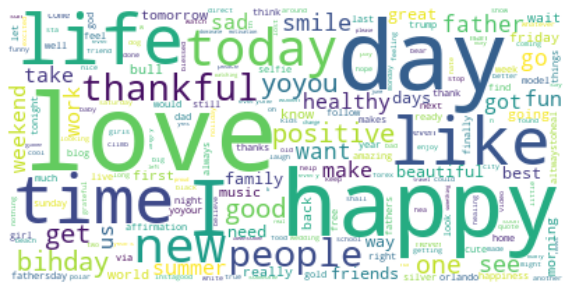

In [136]:
showWords(df['tweet_token_filtered'])

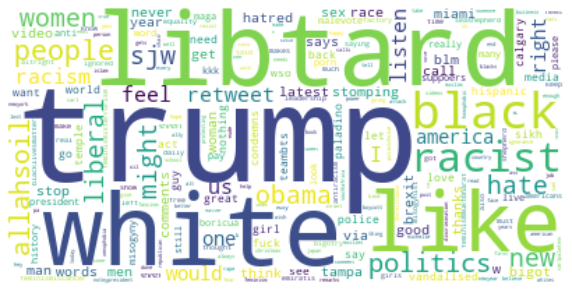

In [137]:
showWords(df[df['label'] == 1.0]['tweet_token_filtered'])

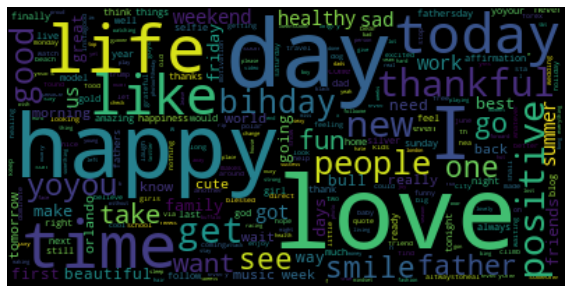

In [138]:
showWords(df[df['label'] == 0.0]['tweet_token_filtered'], bgcolor='black')

Глядя на слова складывается ощущение, что label=0 - это позитивные твиты